In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

C:\Users\gamer\.conda\envs\vesuvius\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\gamer\.conda\envs\vesuvius\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\gamer\.conda\envs\vesuvius\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
DATA_DIR = "../data"
TRAIN_DIR = "../data/train"

# Utility Methods

In [3]:
def load_png(fragment_id: str, png_name: str) -> np.ndarray:
    fragment_dir = os.path.join(TRAIN_DIR, fragment_id)
    path = os.path.join(fragment_dir, f"{png_name}.png")
    image = Image.open(path)
    return np.array(image)

def show_array(array: np.ndarray, name: str, ax, off=True):
    ax.imshow(array, cmap="gray")
    if off:
        ax.axis("off")
    ax.set_title(f"{name}, shape: {array.shape}")

def show_rect_on_inklabels(rect: dict, inklabels: np.ndarray):
    plt.style.use("default")
    fig, ax = plt.subplots()
    show_array(inklabels, "inklabels", ax, off=False)
    patch = Rectangle(xy=(rect["x"], rect["y"]), width=rect["width"], height=rect["height"], linewidth=2, edgecolor="red", facecolor="none")
    ax.add_patch(patch)
    plt.show()

def show_rects_on_inklabels(rects, inklabels: np.ndarray, holdout: dict):
    plt.style.use("default")
    fig, ax = plt.subplots()
    show_array(inklabels, "inklabels", ax, off=False)
    for rect in rects:
        patch = Rectangle(xy=(rect["x"], rect["y"]), width=rect["width"], height=rect["height"], linewidth=2, edgecolor="red", facecolor="none")
        ax.add_patch(patch)
    patch = Rectangle(xy=(holdout["x"], holdout["y"]), width=holdout["width"], height=holdout["height"], linewidth=2, edgecolor="blue", facecolor="none")
    ax.add_patch(patch)
    plt.show()

In [4]:
inklabels1 = load_png(fragment_id="1", png_name="inklabels")
inklabels2 = load_png(fragment_id="2", png_name="inklabels")
inklabels3 = load_png(fragment_id="3", png_name="inklabels")

C:\Users\gamer\.conda\envs\vesuvius\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (140973980 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


# Setup rects for Fragment 1

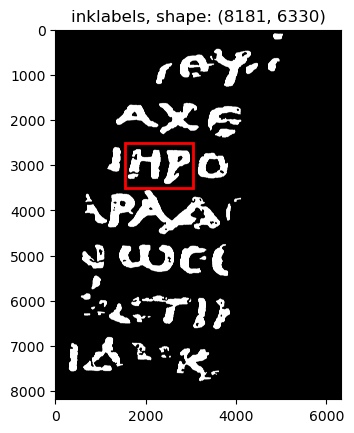

In [67]:
# Ag {"x": 2750, "y": 300, "width": 1500, "height": 1000}
# XE {"x": 2250, "y": 1400, "width": 1800, "height": 1000}
# HP {"x": 1550, "y": 2500, "width": 1500, "height": 900}
# RA {"x": 1100, "y": 3450, "width": 1600, "height": 1000}
# w  {"x": 1300, "y": 4500, "width": 1400, "height": 900}

# Keep iD as the hold out test set for very end prediction after folds?
# iD {"x": 200, "y": 6700, "width": 1400, "height": 1000}

rect1 = {"x": 1550, "y": 2500, "width": 1500, "height": 1000}
show_rect_on_inklabels(rect1, inklabels1)

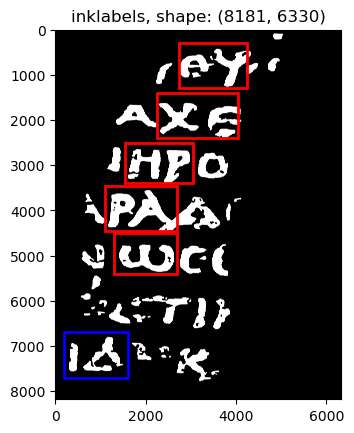

In [16]:
rects1 = [{"x": 2750, "y": 300, "width": 1500, "height": 1000},
         {"x": 2250, "y": 1400, "width": 1800, "height": 1000},
         {"x": 1550, "y": 2500, "width": 1500, "height": 900},
         {"x": 1100, "y": 3450, "width": 1600, "height": 1000},
         {"x": 1300, "y": 4500, "width": 1400, "height": 900}]
show_rects_on_inklabels(rects1, inklabels1, {"x": 200, "y": 6700, "width": 1400, "height": 1000})

# Setup rects for Fragment 2

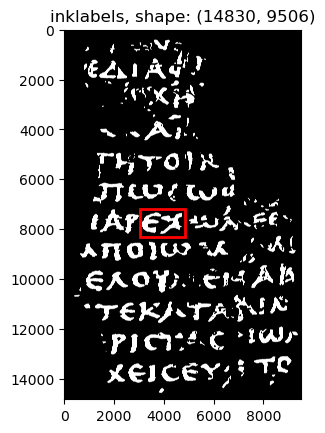

In [164]:
# Ai {"x": 3200, "y": 3350, "width": 1600, "height": 1100}
# OI {"x": 3900, "y": 4600, "width": 1400, "height": 1100}
# lo {"x": 1700, "y": 9450, "width": 1700, "height": 1100}
# eK {"x": 2200, "y": 10700, "width": 1700, "height": 1100}
# ei {"x": 2400, "y": 13200, "width": 1400, "height": 1100}

# Keep iD as the hold out test set for very end prediction after folds?
# ex  {"x": 3050, "y": 7200, "width": 1800, "height": 1100}

rect2 = {"x": 3050, "y": 7200, "width": 1800, "height": 1100}
show_rect_on_inklabels(rect2, inklabels2)

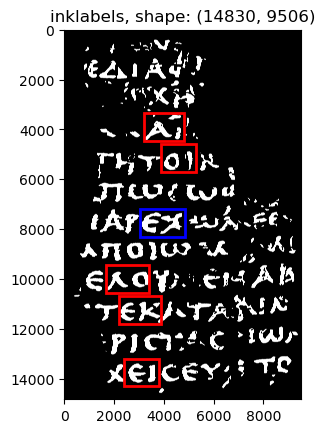

In [17]:
rects2 = [{"x": 3200, "y": 3350, "width": 1600, "height": 1100},
         {"x": 3900, "y": 4600, "width": 1400, "height": 1100},
         {"x": 1700, "y": 9450, "width": 1700, "height": 1100},
         {"x": 2200, "y": 10700, "width": 1700, "height": 1100},
         {"x": 2400, "y": 13200, "width": 1400, "height": 1100}]
show_rects_on_inklabels(rects2, inklabels2, {"x": 3050, "y": 7200, "width": 1800, "height": 1100})

# Setup rects for Fragment 3

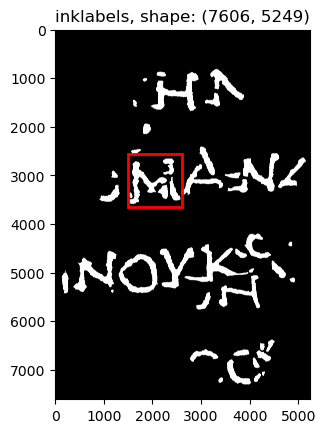

In [171]:
# H {"x": 2000, "y": 750, "width": 1000, "height": 1000}
# N {"x": 3750, "y": 2450, "width": 900, "height": 1000}
# M {"x": 1250, "y": 4550, "width": 900, "height": 900}
# Y {"x": 2100, "y": 4400, "width": 800, "height": 1000}
# C {"x": 3500, "y": 6300, "width": 1000, "height": 1100}

# Keep iD as the hold out test set for very end prediction after folds?
# N {"x": 350, "y": 4500, "width": 1000, "height": 1000}

rect3 = {"x": 1500, "y": 2550, "width": 1100, "height": 1100}
show_rect_on_inklabels(rect3, inklabels3)

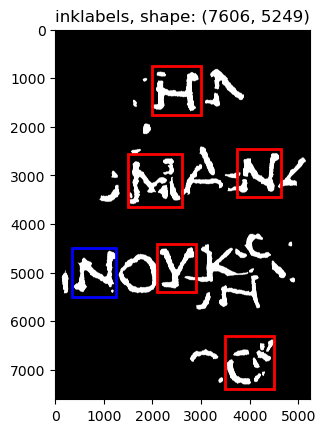

In [19]:
rects3 = [{"x": 2000, "y": 750, "width": 1000, "height": 1000},
         {"x": 3750, "y": 2450, "width": 900, "height": 1000},
         {"x": 1500, "y": 2550, "width": 1100, "height": 1100},
         {"x": 2100, "y": 4400, "width": 800, "height": 1000},
         {"x": 3500, "y": 6300, "width": 1000, "height": 1100}]
show_rects_on_inklabels(rects3, inklabels3, {"x": 350, "y": 4500, "width": 900, "height": 1000})